# How do we train a Deep Learning model?

In [ ]:
# import packages
import sys, os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, Subset

In [2]:
# load in the data
# make a toy dataset with 1000 samples
np.random.seed(0)
n = 1000 # number of samples
x = np.random.rand(n, 1)
y = 2 * x + 1 + (0.1 * np.random.randn(n, 1))

Plan:
`x -> model -> y`

In [5]:
# turn the data into a torch tensor
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [6]:
# create a simple dataset class
class SimpleDataset(Dataset):

    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data
    
    # what happens when we call len(dataset)?
    def __len__(self):
        return len(self.x_data)
    
    # what happens when we call dataset[idx]?
    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]

dataset = SimpleDataset(x_tensor, y_tensor)

In [7]:
# create a dataloader and split into train and test
train_prop = 0.8 # 80%
train_size = int(train_prop * len(dataset)) # .80 * 1000 = 800
train_idx = np.random.choice(len(dataset), train_size, replace=False) # random sample 800 indices, w/o replacement
test_idx = np.setdiff1d(np.arange(len(dataset)), train_idx) # get the indices that are not in train_idx

train_dataset = Subset(dataset, train_idx) 
test_dataset = Subset(dataset, test_idx)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [8]:
for x_batch, y_batch in train_loader:
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([8, 1]) torch.Size([8, 1])


In [89]:
# load in the model
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        # architecture: fc (1 -> 64) -> ReLU -> fc (64 -> 1)
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 1)
        self.act = nn.ReLU()
    
    def forward(self, x):

        x = self.fc1(x) # 1 -> 64
        x = self.act(x) # 64
        x = self.fc2(x) # 64 -> 1

        return x

In [ ]:
# single example
# get batch
x, y = next(iter(train_loader))

# zero the gradients (tell the optimizer to forget the gradients from the last batch)
optimizer.zero_grad()

# forward pass (make a prediction)
y_pred = model(x)

# calculate the loss
loss = loss_fn(y_pred, y)
print(loss.item())

# backward pass (calculate the gradients)
loss.backward()

# update the weights
optimizer.step()

3.1587750911712646


In [ ]:
# training loop (single epoch)

i = 0
# get batch
for x, y in train_loader:
    
    # zero the gradients (tell the optimizer to forget the gradients from the last batch)
    optimizer.zero_grad()

    # forward pass (make a prediction)
    y_pred = model(x)

    # calculate the loss
    loss = loss_fn(y_pred, y)

    # backward pass (calculate the gradients)
    loss.backward()

    # update the weights
    optimizer.step()

    i += 1

    print(f"Loss: {loss.item()} | Batch: {i}/{len(train_loader)}", end="\r")

In [101]:
# configure training, set up the optimizer
model = Net()
loss_fn = nn.MSELoss() # loss function: what direction we want to go
optimizer = optim.AdamW(model.parameters(), lr=1e-3) # learning rate: how much we want to move in that direction

In [102]:
# training loop (multiple epochs)
n_epochs = 100

train_losses = []
test_losses = []

for epoch in range(n_epochs):

    # init losses
    train_loss = 0.0
    test_loss = 0.0

    # training
    model.train()

    # get batch
    for x, y in train_loader:

        # zero the gradients (tell the optimizer to forget the gradients from the last batch)
        optimizer.zero_grad()

        # forward pass (make a prediction)
        y_pred = model(x)

        # calculate the loss
        loss = loss_fn(y_pred, y)

        # backward pass (calculate the gradients)
        loss.backward()

        # update the weights
        optimizer.step()

        train_loss += loss.item()
        train_losses.append(loss.item())

    # normalize the loss
    train_loss /= len(train_loader)
    
    # evaluate the model
    model.eval()
    with torch.no_grad():
        for x, y in test_loader:

            # forward pass (make a prediction)
            y_pred = model(x)

            # calculate the loss
            loss = loss_fn(y_pred, y)

            test_loss += loss.item()
            test_losses.append(loss.item())
    
    # normalize the loss
    test_loss /= len(test_loader)

    print(f"Epoch: {epoch+1}/{n_epochs} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")


Epoch: 1/100 | Train Loss: 1.0350 | Test Loss: 0.1132
Epoch: 2/100 | Train Loss: 0.0629 | Test Loss: 0.0280
Epoch: 3/100 | Train Loss: 0.0187 | Test Loss: 0.0129
Epoch: 4/100 | Train Loss: 0.0124 | Test Loss: 0.0109
Epoch: 5/100 | Train Loss: 0.0111 | Test Loss: 0.0098
Epoch: 6/100 | Train Loss: 0.0104 | Test Loss: 0.0094
Epoch: 7/100 | Train Loss: 0.0100 | Test Loss: 0.0093
Epoch: 8/100 | Train Loss: 0.0097 | Test Loss: 0.0091
Epoch: 9/100 | Train Loss: 0.0097 | Test Loss: 0.0100
Epoch: 10/100 | Train Loss: 0.0096 | Test Loss: 0.0095
Epoch: 11/100 | Train Loss: 0.0094 | Test Loss: 0.0092
Epoch: 12/100 | Train Loss: 0.0096 | Test Loss: 0.0095
Epoch: 13/100 | Train Loss: 0.0094 | Test Loss: 0.0094
Epoch: 14/100 | Train Loss: 0.0095 | Test Loss: 0.0092
Epoch: 15/100 | Train Loss: 0.0095 | Test Loss: 0.0093
Epoch: 16/100 | Train Loss: 0.0094 | Test Loss: 0.0094
Epoch: 17/100 | Train Loss: 0.0094 | Test Loss: 0.0093
Epoch: 18/100 | Train Loss: 0.0094 | Test Loss: 0.0093
Epoch: 19/100 | Tra

Text(0, 0.5, 'Loss')

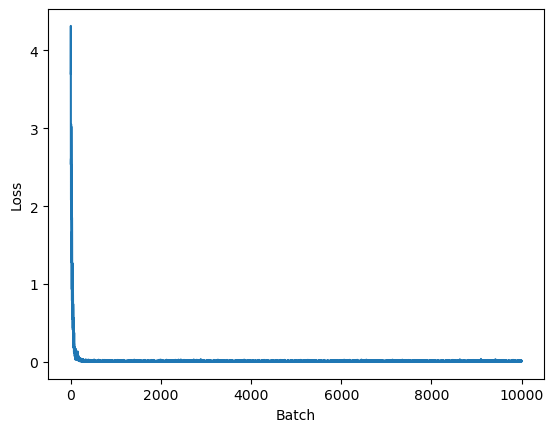

In [105]:
# plot the losses per epoch
plt.plot(train_losses, label="Train Loss")
plt.xlabel("Batch")
plt.ylabel("Loss")